# Project Goal 
* Codeup staff bring up some questions to the data science team in email regarding concerns of the curriculum's safety.

* Our goal is to answer the quesions and identify users with abnormal activity through anomaly detection and data analysis.

# Questions Raised
### 1.  Which lesson appears to attract the most traffic consistently across cohorts (per program), which lessons are least accessed?

### 2.  Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over? 

### 3.  Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

### 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? 

### 5.  At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### 6.  What topics are grads continuing to reference after graduation and into their jobs (for each program)?

### 7.  Which lessons are least accessed?

## Data Dictionary 

|Variable|	Value	|Meaning
|---|----|---|
|date	|datetime|	The date of log entry|
|time	|datetime	|The time of the day of log entry|
|path	|string|	The path the user is on|
|user id	|float	|The primary key of log table, indicating each user|
|ip|	string|	The user's ip address|
|cohort name	|string	|The name of user's cohort|
|slack|	string|	The name of the slack chanel that user belongs to|
|start date|	datetime|	The start date of the cohort|
|end date	|datetime	|The end date of the cohort|
|program id	|datetime	|This indicates which program is the user in|

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os
# Import functions
import wrangle as wr

# set columnns display format
pd.set_option('display.max_columns', None)

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
df = wr.get_data()

# Check the shape of our messy dataframe
df.shape

(847330, 11)

In [2]:
# Cleaning the data using function from prepare.py
df = wr.prep_data(df)

# Checking the shape of our cleaned dataframe
df.shape

(847329, 12)

In [3]:
df

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,71.150.217.33,jquery/personal-site,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java
2021-04-21,2021-04-21,16:42:02,71.150.217.33,jquery/mapbox-api,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java
2021-04-21,2021-04-21,16:42:09,71.150.217.33,jquery/ajax/weather-map,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java


## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program), which lessons are least accessed?

* Create and separate the datasets of Web Development and Data Science programs.
* Remove the popular logistic pages in the curriculum. I.E. '/' = main page, 'toc' = Table of Contents, et.c
* Use .value_counts() on path to see the most accessed pages.
* Store the top 10 page names with page counts as a variable.

In [4]:
wr.q1_web(df)

path
javascript-i                                                                 18193
java-iii                                                                     13162
html-css                                                                     13111
java-ii                                                                      12173
spring                                                                       11877
jquery                                                                       11037
mysql                                                                        10602
java-i                                                                       10460
javascript-ii                                                                10290
javascript-i/introduction/working-with-data-types-operators-and-variables     7326
Name: count, dtype: int64


In [5]:
wr.q1_ds(df)


path
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
Name: count, dtype: int64


### Takeaways:

* Data Science cohorts access classification/overview the most.

* Web Development cohorts access javascript-i the most.

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### Full Stack

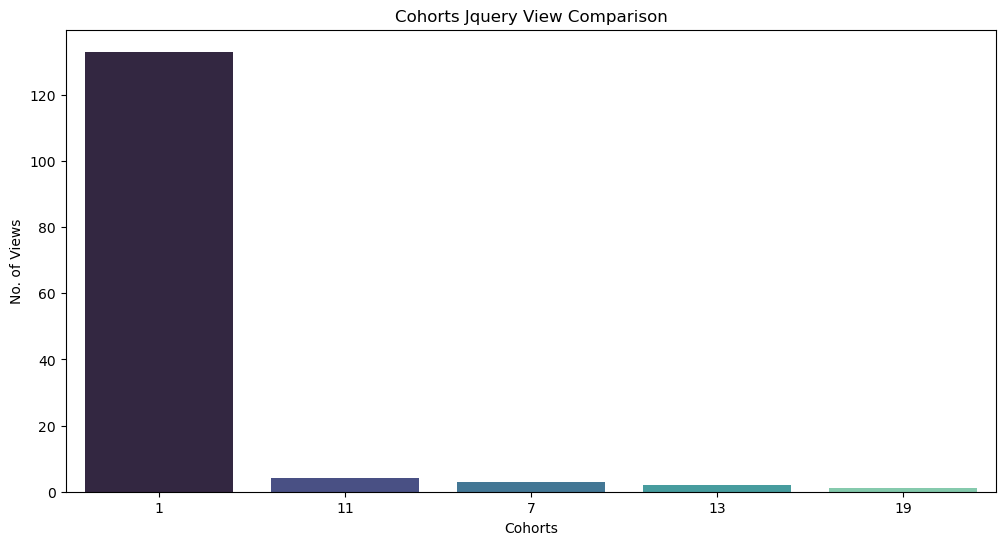

In [6]:
# Calling function to plot bar chart comparing cohort 1 and others
wr.q2_p1()

Cohort 1 looked at jquery much more than cohorts 13, 19, 7, and 11.

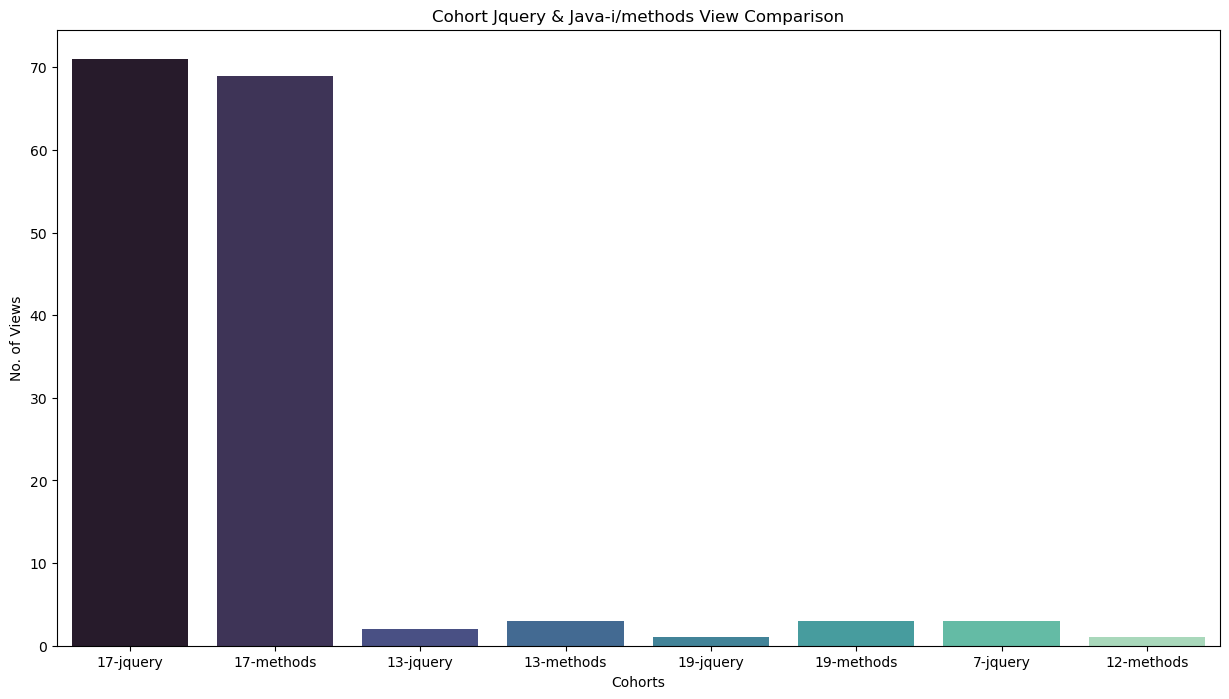

In [7]:
# Calling function to plot bar chart comparing cohort 17 and others 
wr.q2_p2()

Cohort 17 looked at jquery and java-1/methods much more than cohorts 13, 19, 7, and 12.

## Takeaways:
* For Full Stack PHP (Web Development) Program:

    - cohort 1 looked at jquery much more than other cohorts

    - cohort 17 looked at jquery and java-1/methods much more than other cohorts.

## Question 3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [8]:
# This function return the users who have hardly accessed the curriculum during their active time at Codeup.
result_df = wr.q3_result()
result_df

,User_id,Cohort_id,Cohort_name,Program
0,940,138,Neptune,Full Stack Java
1,918,138,Neptune,Full Stack Java
2,879,135,Macro,Full Stack Java
3,619,57,Ganymede,Full Stack Java


# Takeaways:
* 4 users hardly ever accessed the curriculum.

* All 4 users are from Full Stack Java (Web Development) Program. Their information are provided above.

## Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

* Any users have significant amount of IP address?

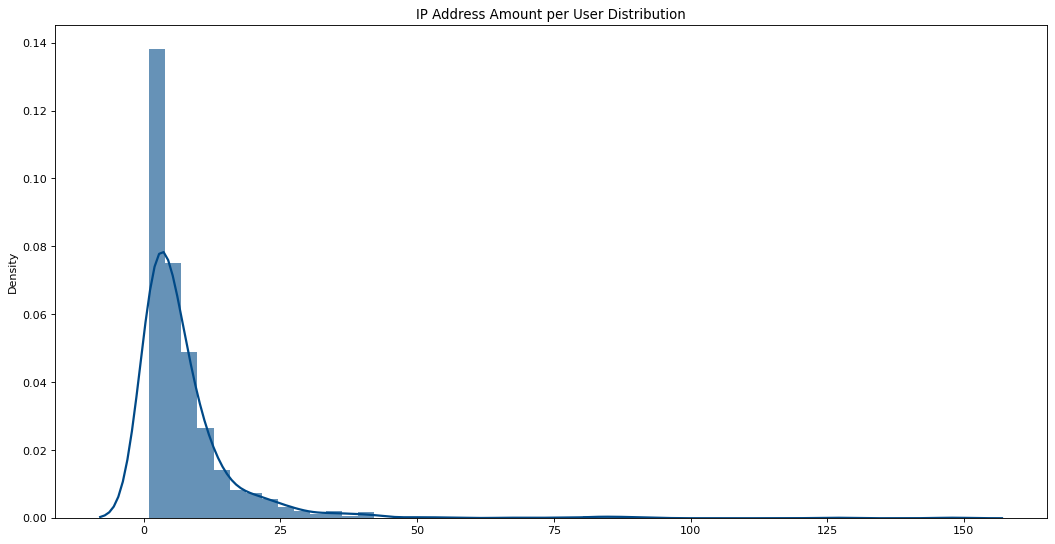

In [9]:
# overall distribution of ip address amount of users
wr.q4_distribution(df)

* Using IQR to determind the upper bound for the amount of IP address belongs to each user

In [10]:
# Callinng function to print out the upper bound
wr.q4_upperbound(df)

The upper bound of IP address amount is:  30.0


* Removing users with abnormal amount of IP address

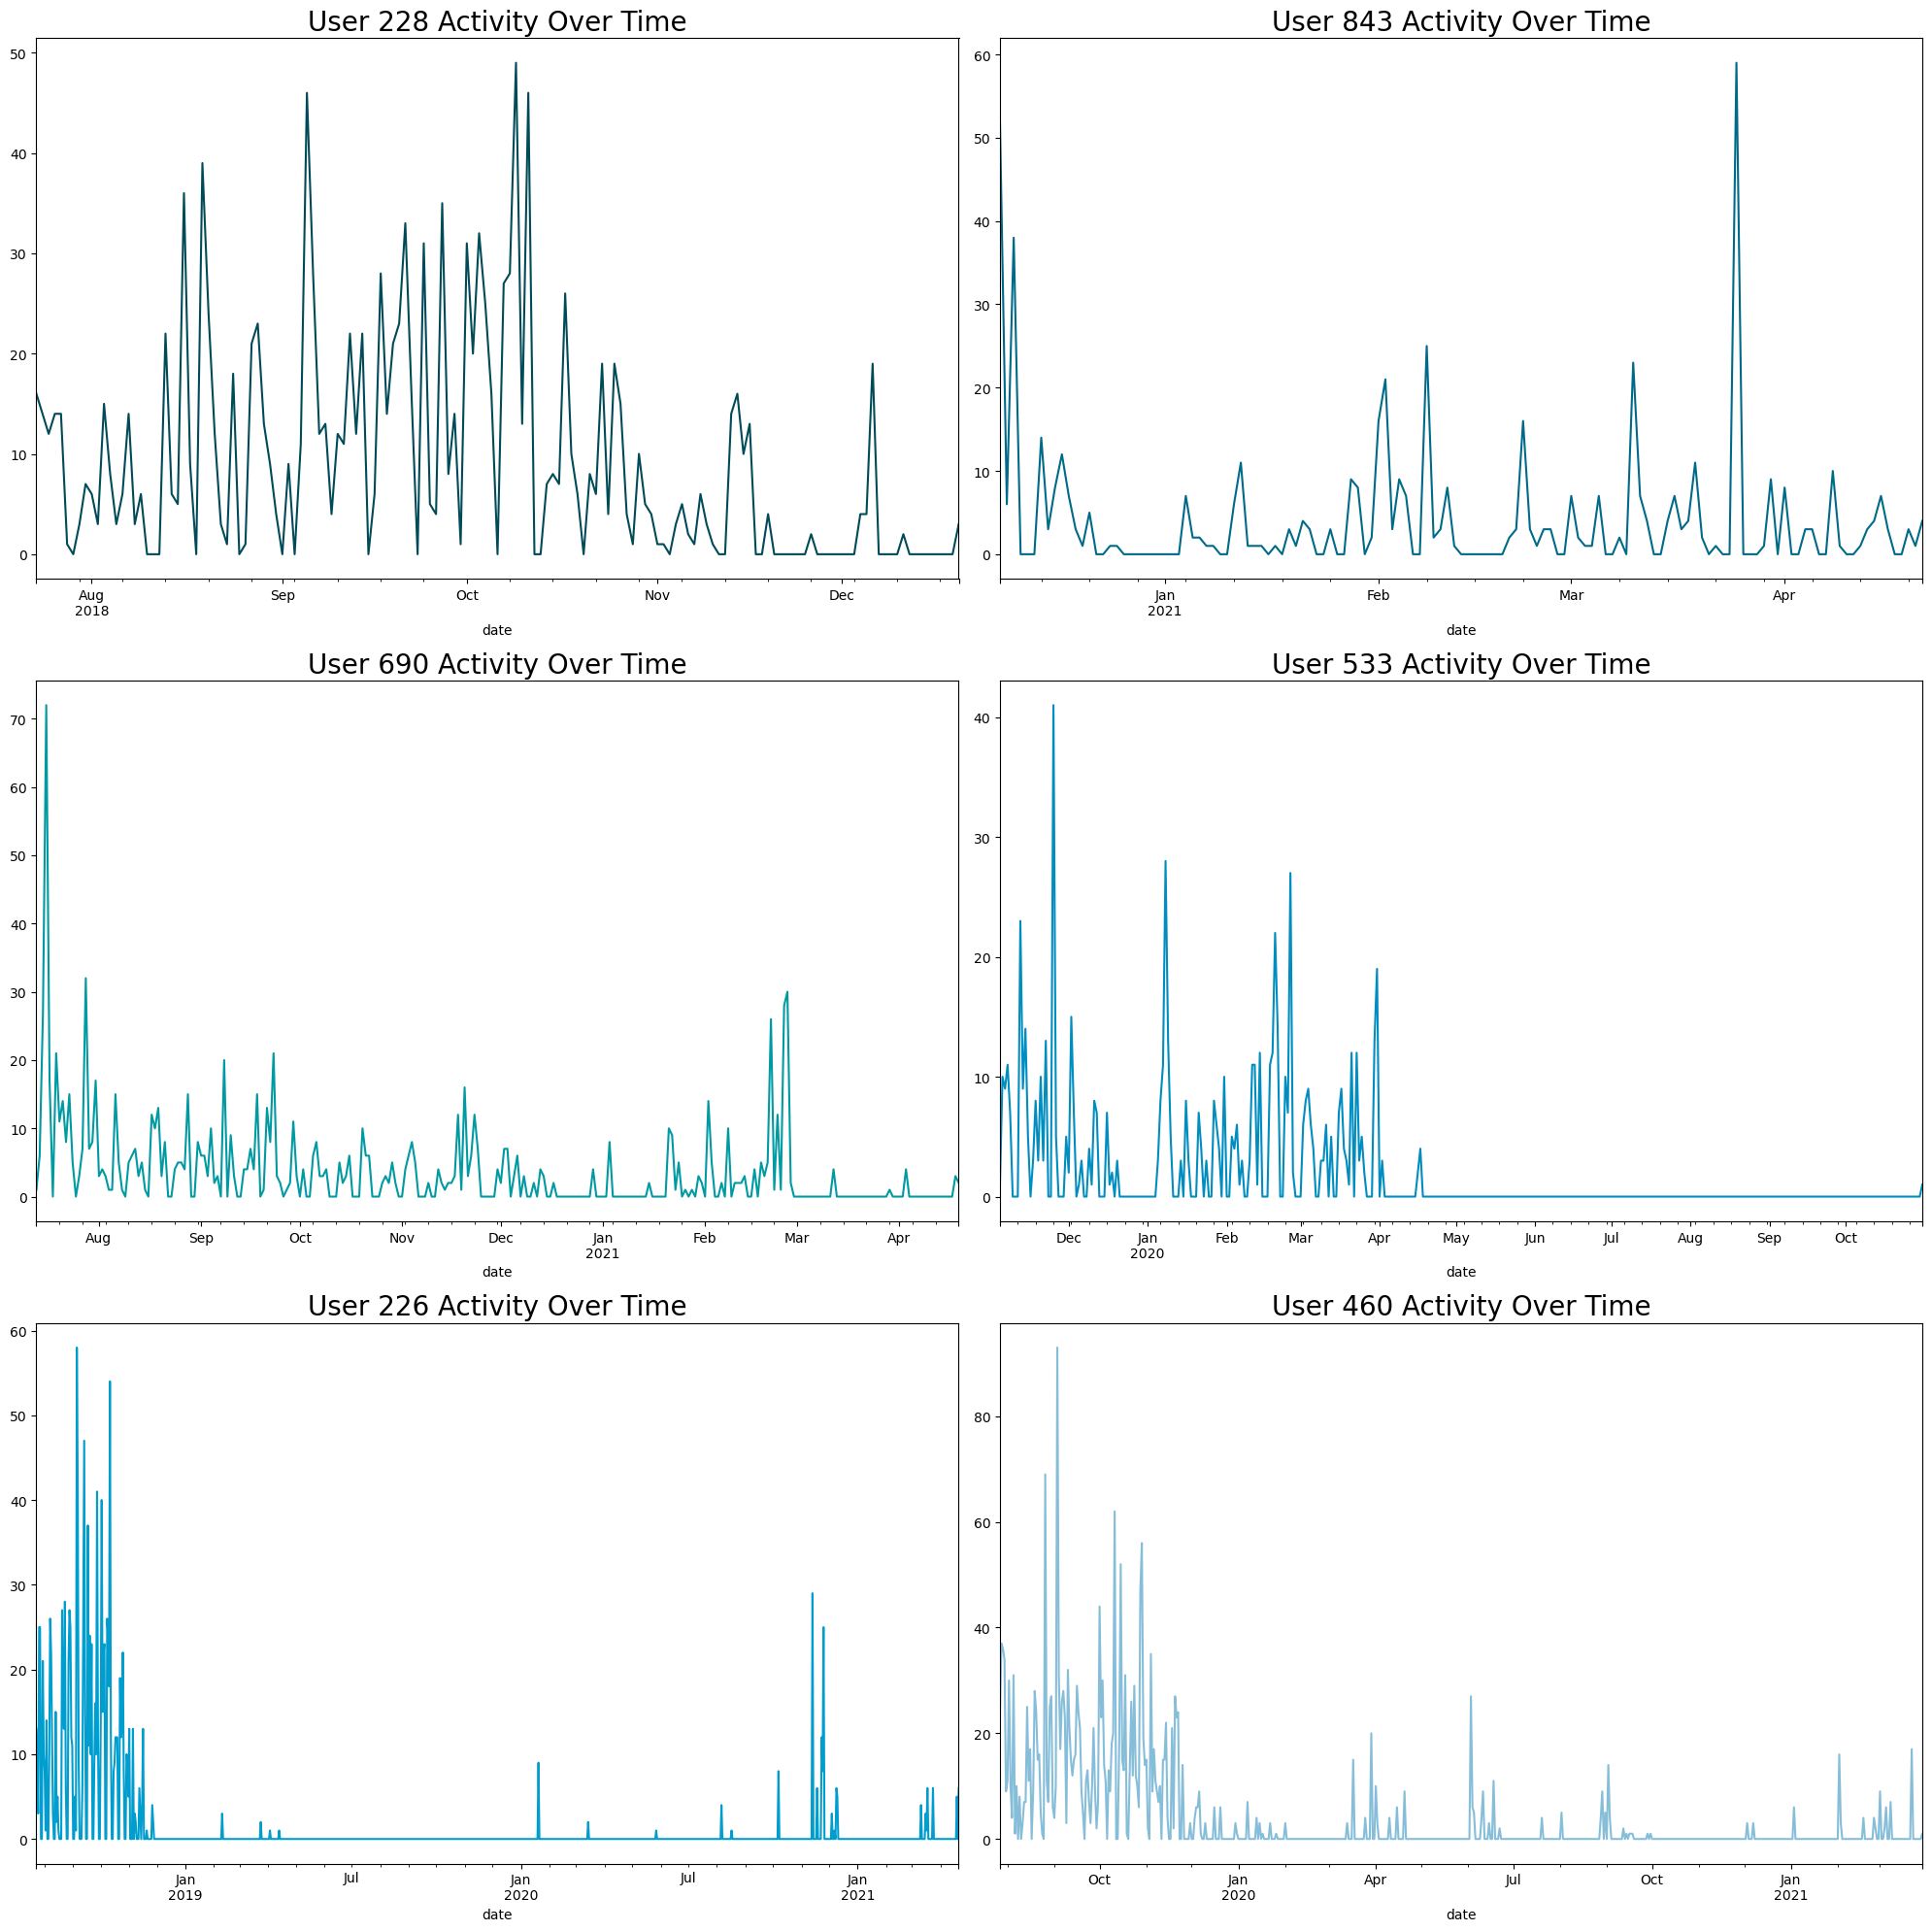

In [11]:
# Calling function to visualize the top 6 users with abnormal amount of IP addresses
wr.q4_abnormal_ip(df)

* Examine user's activity over time to find suspicious activity

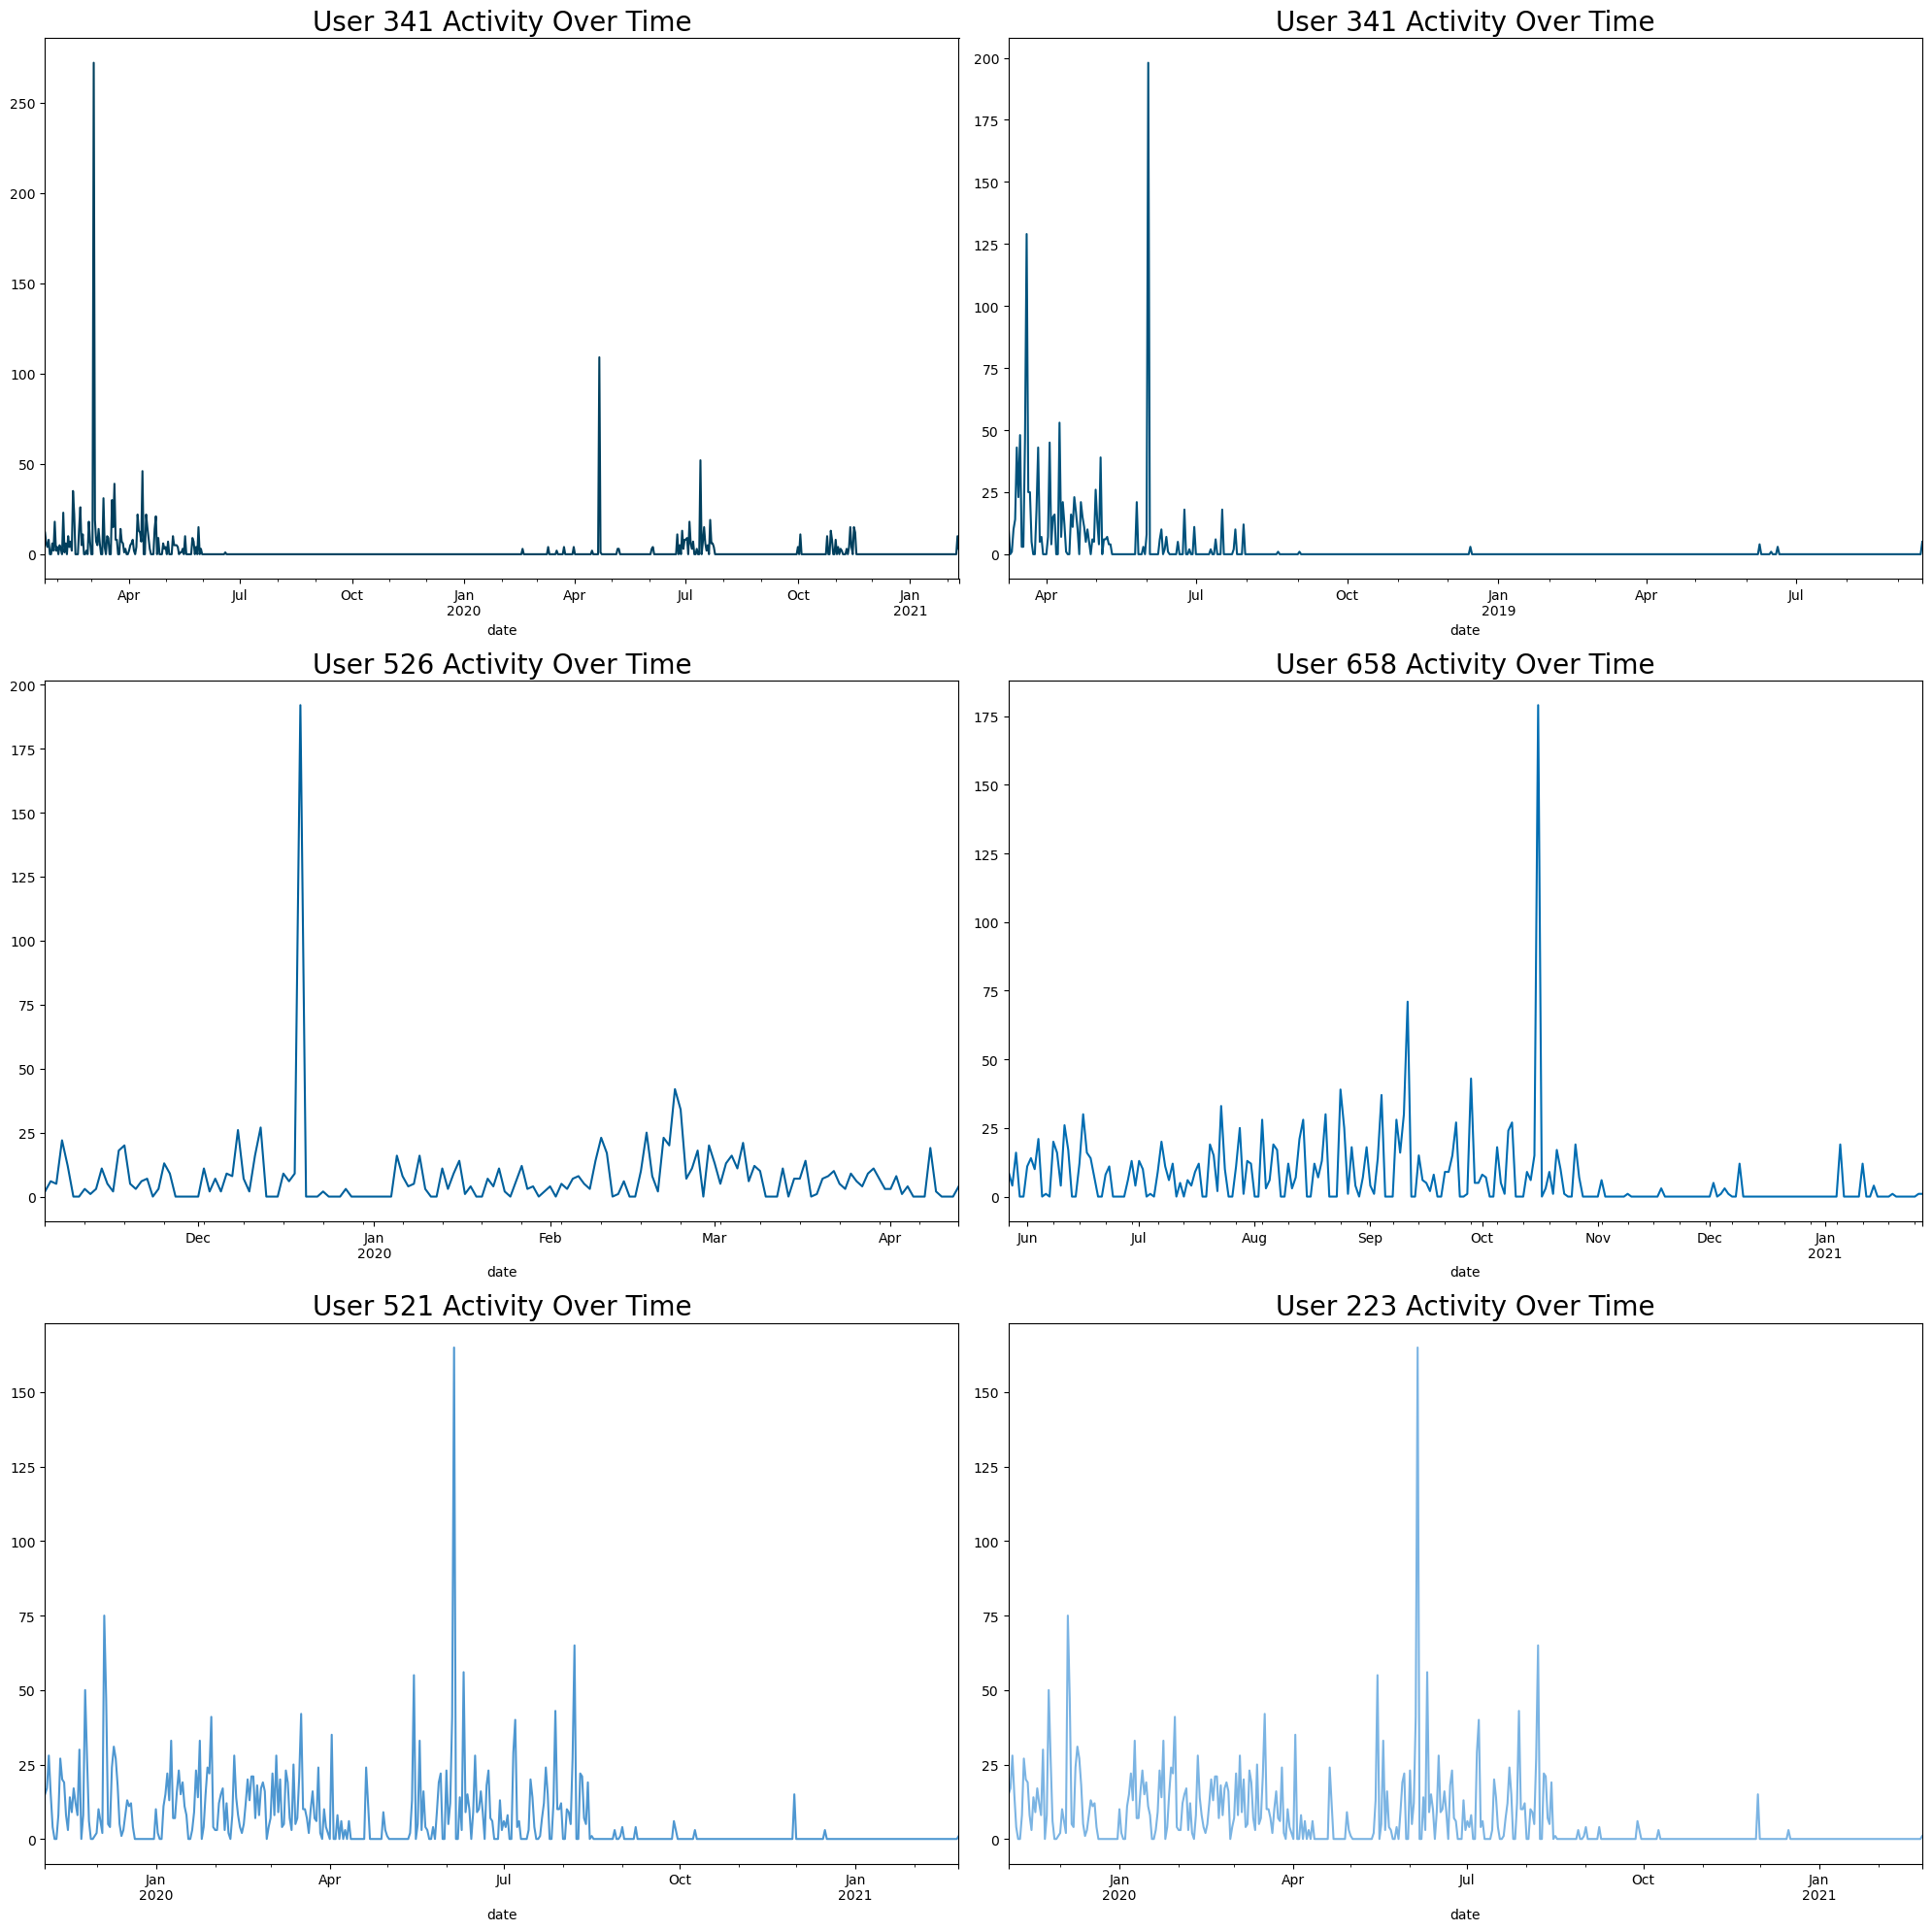

In [12]:
# Calling function to visualize the top 6 users with most page visits and abnormal activity pattern
wr.q4_abnormal_users(df)

## Takeaways:

* 116 users have abnormal amount of log entry.

* There are 29 users have suspicious activities, among those users we suspect 2 of them perform web-scrapping and 3 appear to be accessing curriculums that they shouldn't access.

* There are no suspicious IP addresses. For those who have significant amount of IP addresses during their program, their IP address appear to be distributed accross the United States.

## Question 5: At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [13]:
# Calling user-defined function to store data science and web dep student in 2 dataframes
ds, wd = wr.q5(df)

* Data Science

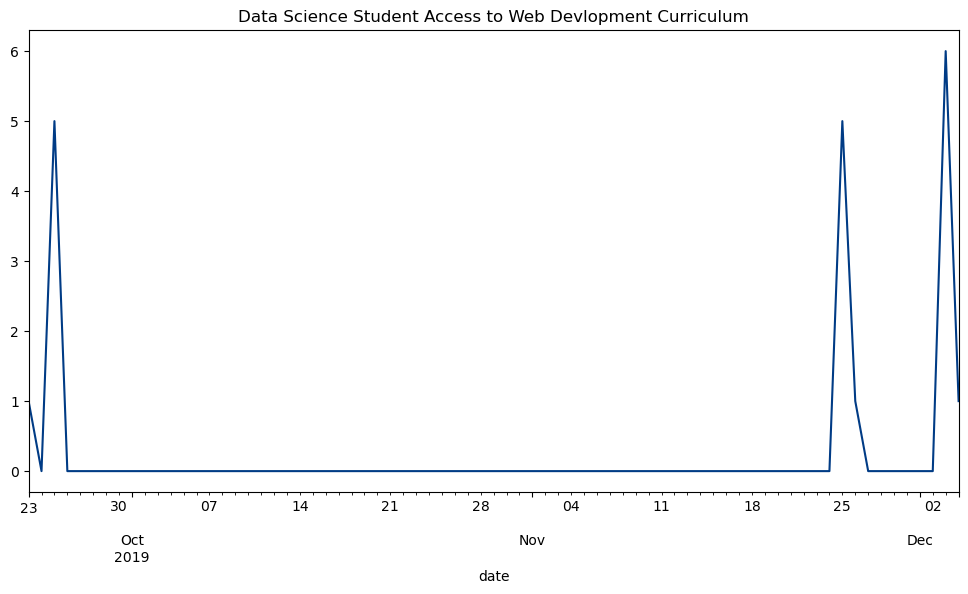

In [14]:
wr.q5_ds(ds)


* Web Developement

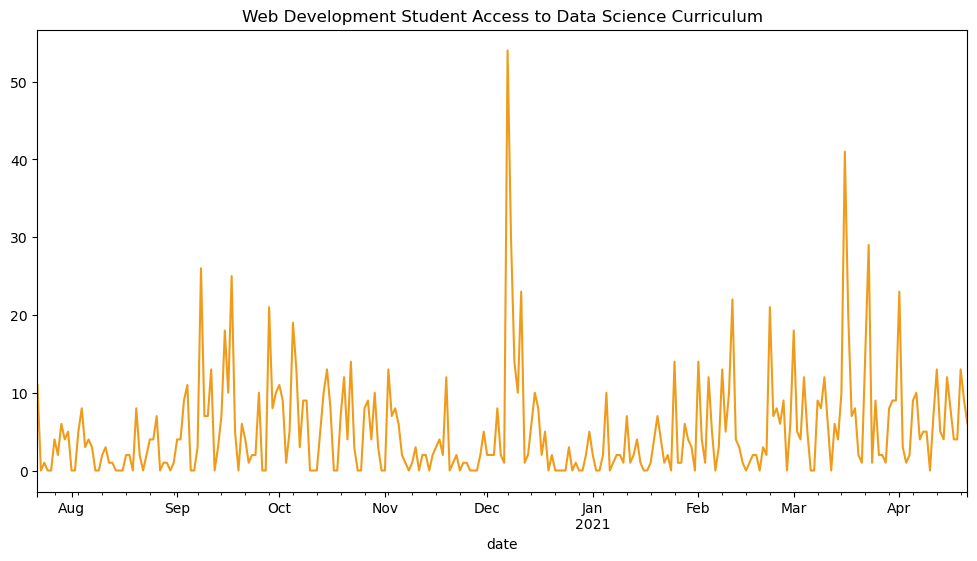

In [15]:
wr.q5_wd(wd)

## Takeaways:

* Data Science: There does not appear to be any access to the Web Dev paths before September 2019, and after December 2019. Which leads us to believe they did not have access during those time periods.

* Web Development: There appears to be access to the Data Science paths after September 2019. Specifically, from July 2020 to April 2021.

## Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

* Overall post graduation number of log entry per program

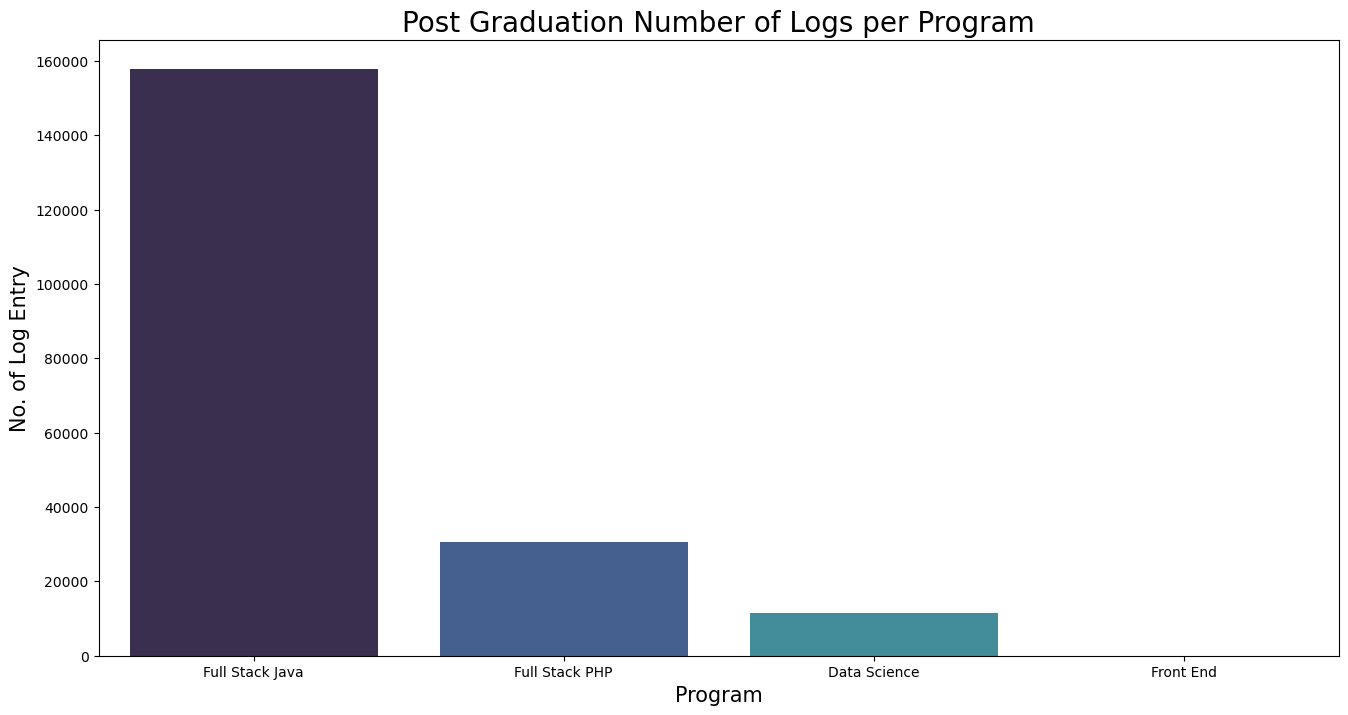

In [16]:
# Calling function to plot the bargraph
wr.q6(df)

* Full Stack Java

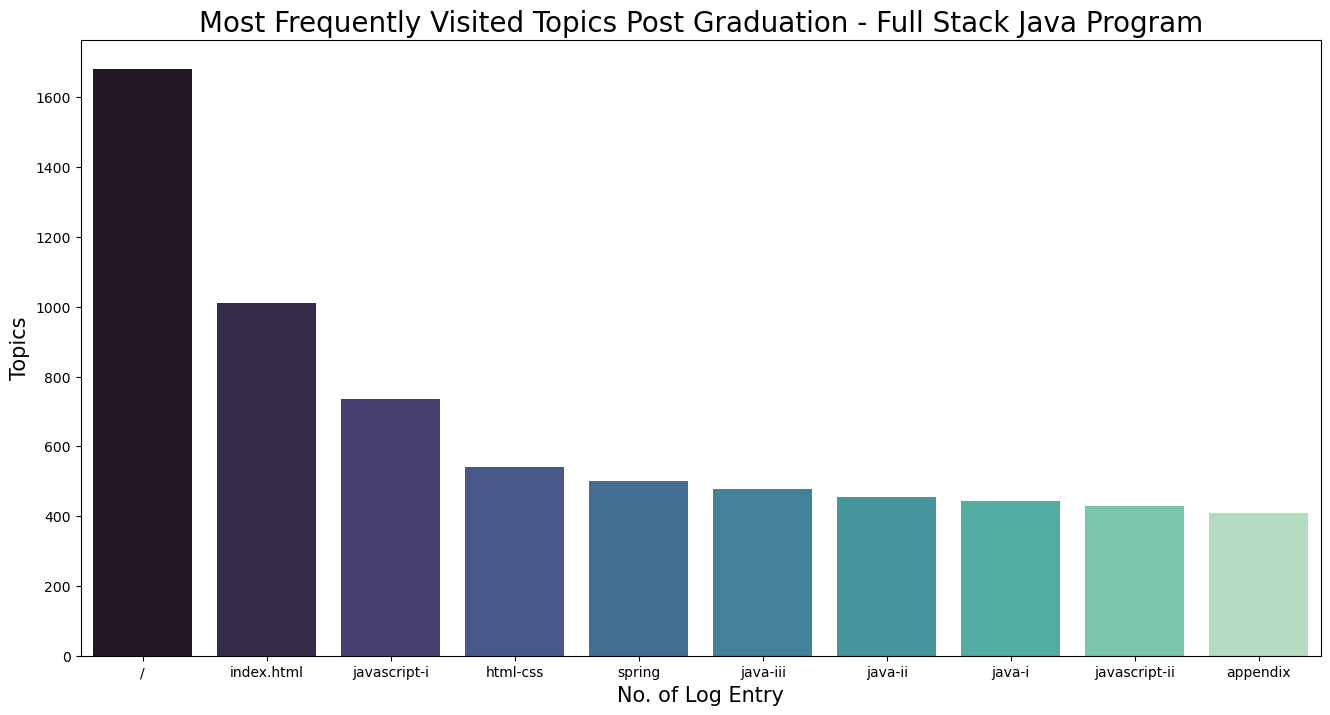

In [17]:
# Calling function to plot the top tops for full stack java program
wr.q6_p1(df)

* Full Stack PHP

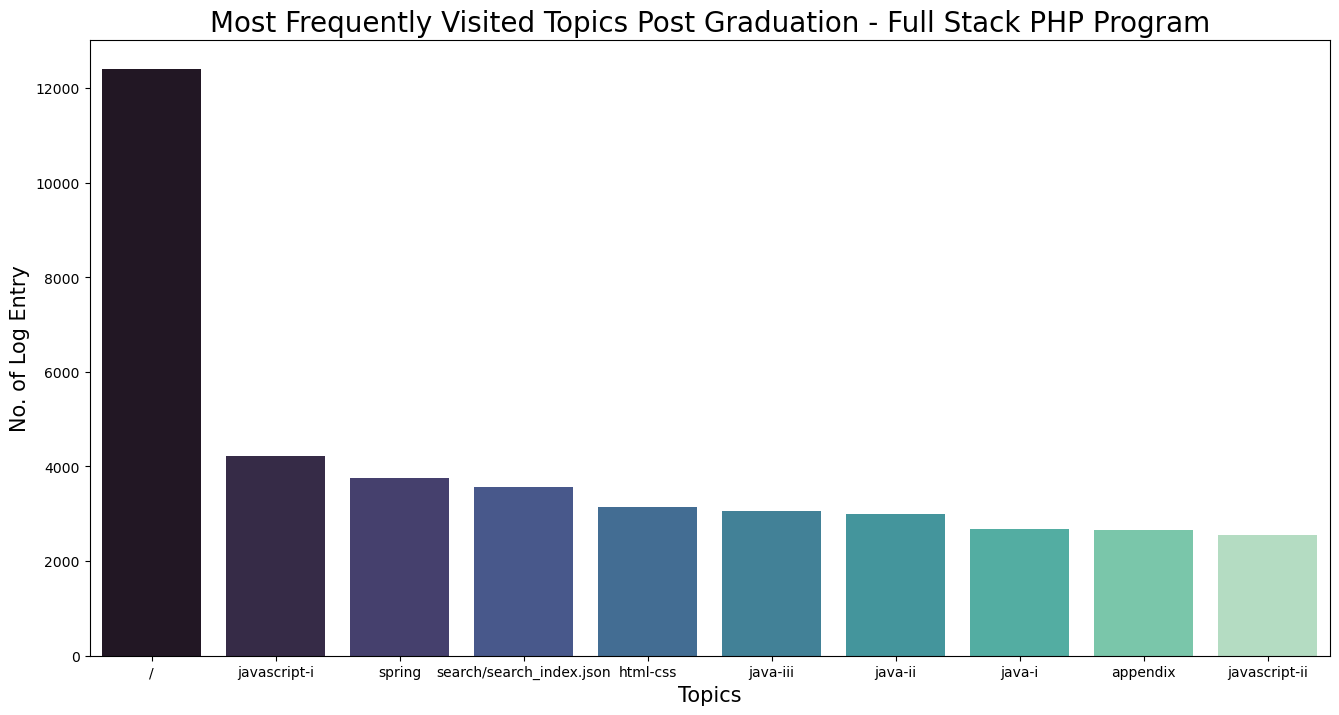

In [18]:
wr.q6_p2(df)

* Data Science

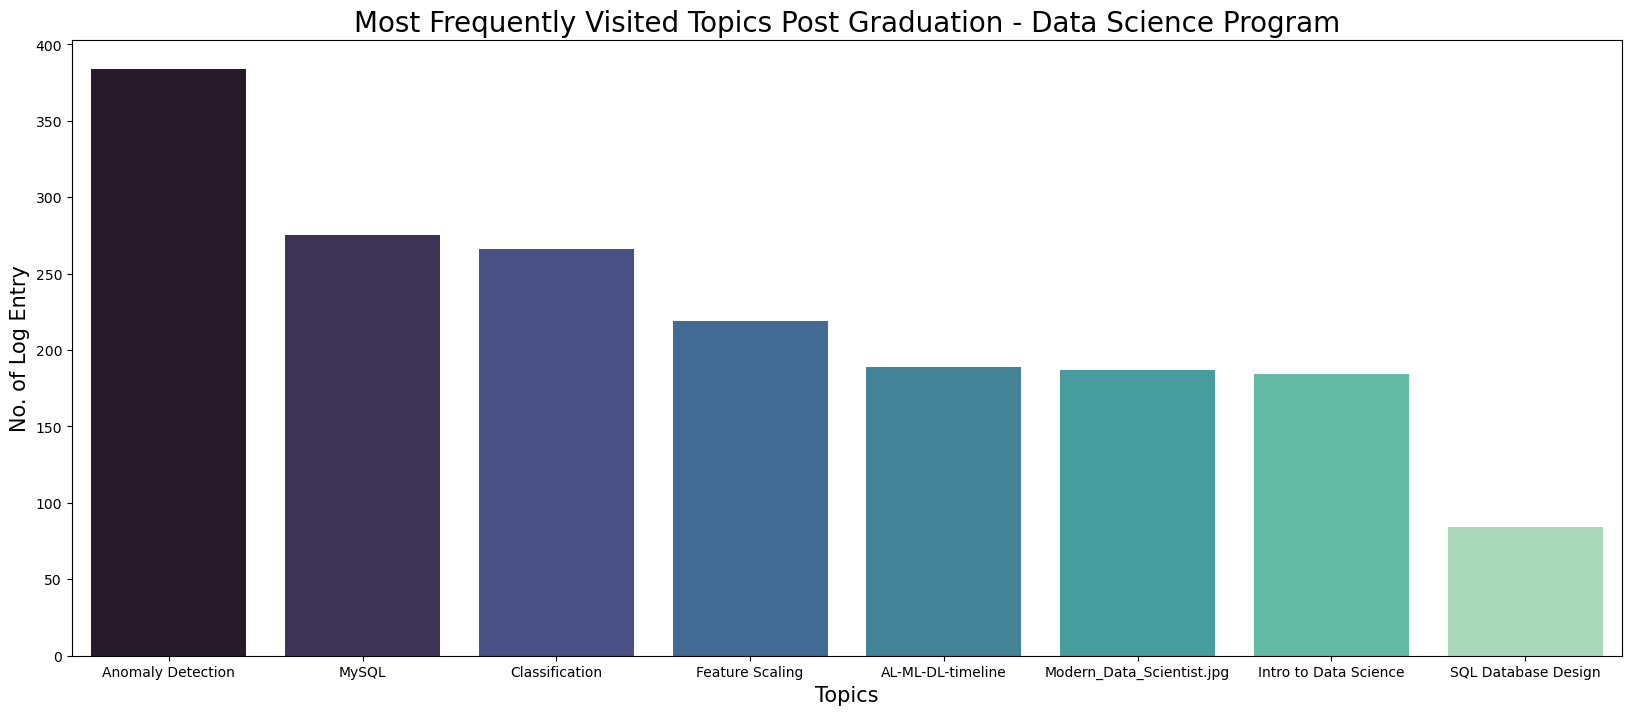

In [19]:
# Calling function to plot the top tops for data science program
wr.q6_p3(df)

* Front End

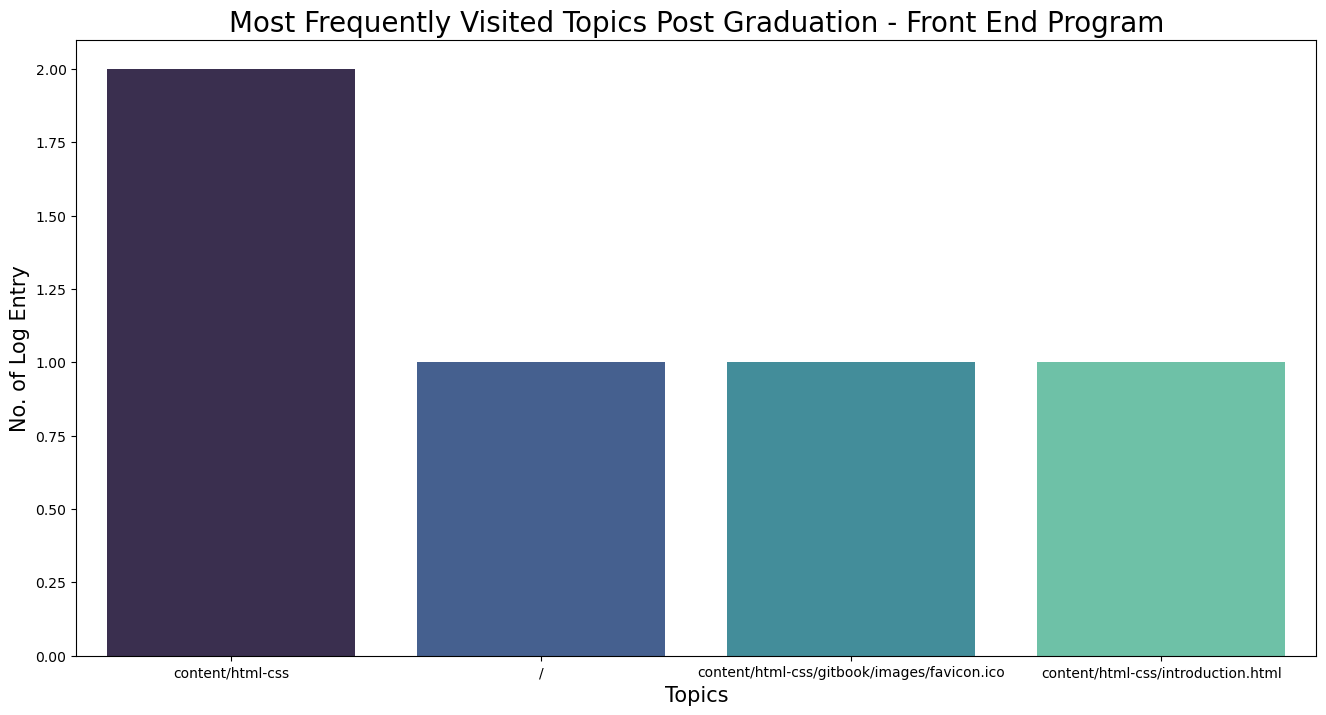

In [20]:
wr.q6_p4(df)

## Takeaways:
* Most Visited Topics For Full Stack Java: HTML, JavaScript, CSS, Spring, and Java.

* Most Visited Topics For Full Stack PHP: JavaScript, spring, CSS, and Java.

* Most Visited Topics For Data Science: Anomaly Detection, mySQL, Classification, Feature Scaling, and AL-ML-DL.

* Most Visited Topics For Front End: HTML, CSS, Introduction to HTML-CSS.

## Question 7: Which lessons are least accessed?

* Web Development
    * Web Development Program here is referring to Full Stack PHP, Full Stack Java, Front End programs.

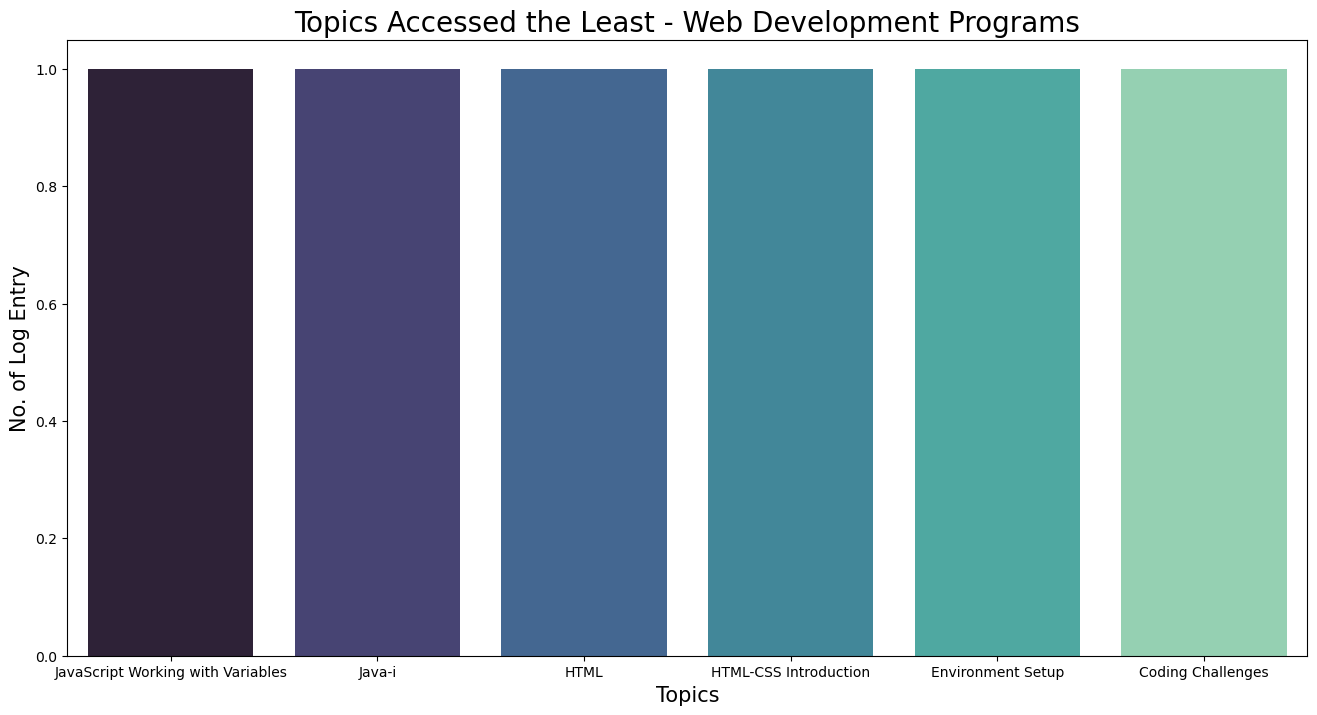

In [21]:
wr.q7_p1(df)

* Data Science:

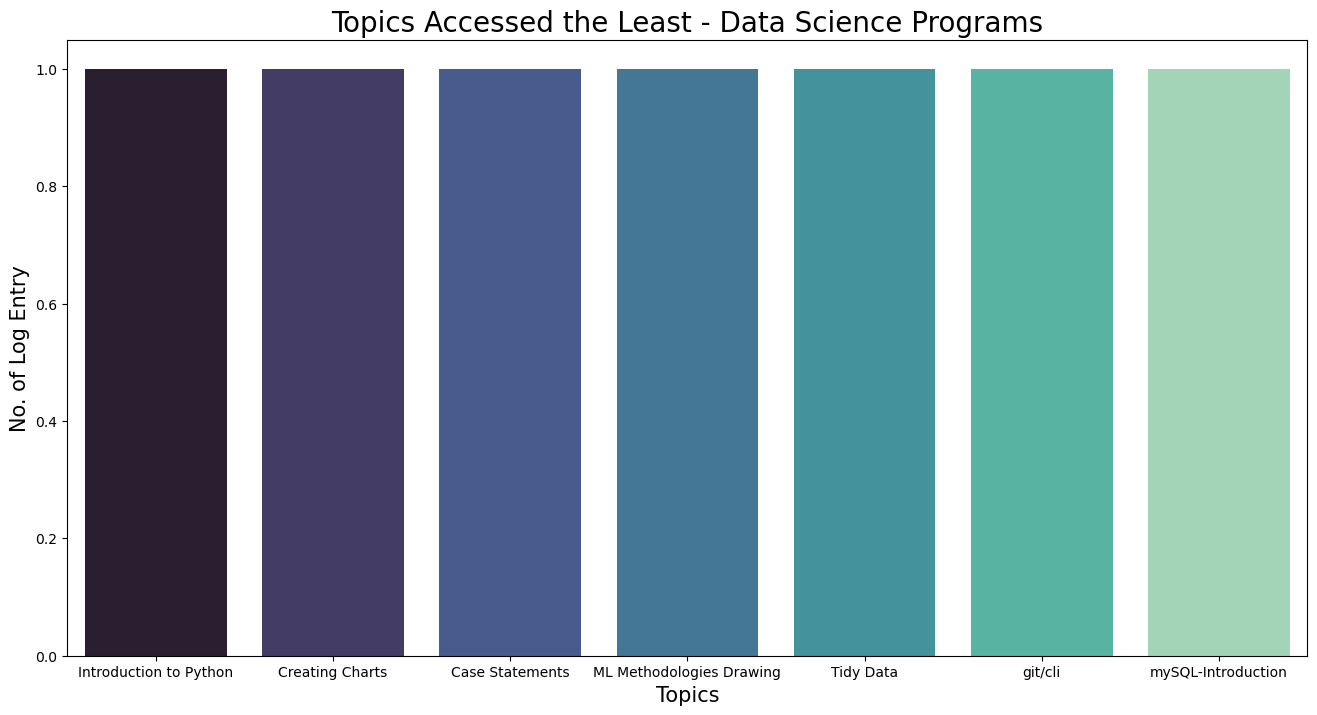

In [22]:
wr.q7_p2(df)

## Takeaways:
* Web Development: there are 400+ pages that were accessed only once.

* Data Science: there are 100+ pages that were accessed only once.

* Many of the pages are introduction pages with no useful information.